# Estimating the capacity of a hyperdictionary/hypervector

There is likely a nice mathematical way to estimate how many categories a hypervector can store, given that each category is just a random projection. Since our hyper vectors are (50%/50%, +1/-1), there is a certain amount and probability of overlap. 

We force the hypervectors to have exactly 50/50 +1/-1, but it may be easier to think of them as independent.

If we have just two N-D hypervectors like this, then the probability of overlap is just flipping a coin for each N:



In [2]:

import random_idx
import utils
import pickle

from pylab import *

%matplotlib inline

height has been deprecated.

2016-02-02 14:02


In [3]:
n, p = 1000, 0.5
trials = 10000
s = np.random.binomial(n, p, trials)

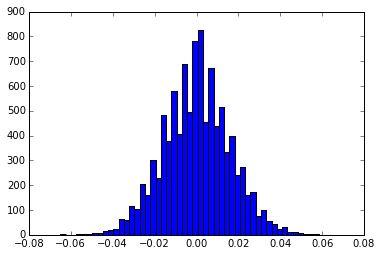

In [4]:
hist((s-mean(s))/n, 50);

So, essentially the closer to the mean, the *more orthogonal* the vectors are. This histogram is related to the probability distribution of the dot product of two random 1000-D ([n]-D) hypervectors. 

In [5]:
# so lets monte-carlo our way to the actual distribution

def random_hypvec_distribution(N_pos=5000, N_neg=5000, trials=10000):
    N = N_pos + N_neg
    
    main_hypvec = np.random.permutation(np.hstack((np.ones(N_pos), -np.ones(N_neg))))

    dot_vals = np.zeros(trials)

    for t in range(trials):
        rhypvec = np.random.permutation(np.hstack((np.ones(N_pos), -np.ones(N_neg))))
    
        dot_vals[t] = np.dot(main_hypvec.T, rhypvec)
        
    return dot_vals


8


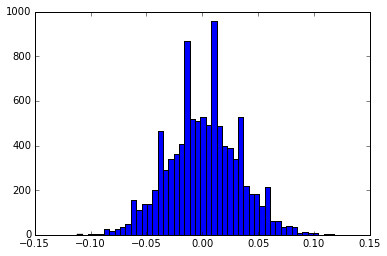

In [6]:
N_pos = 500
N_neg = 500
N = N_pos + N_neg
dot_vals = random_hypvec_distribution(N_pos, N_neg)
hist(dot_vals/N, 50);

print len(np.nonzero(np.abs(dot_vals/N) > 0.1)[0])

So, a bit wider than the pure binomial distribution would suggest, but this is likely because we have exactly (50%/50%, +1/-1). But for any two random 1000-D ([N]-D) hypervectors, we can expect >0.1 dot product around 16/1000=0.16% of the time.

Of course, increasing N tightens the distribution:

0


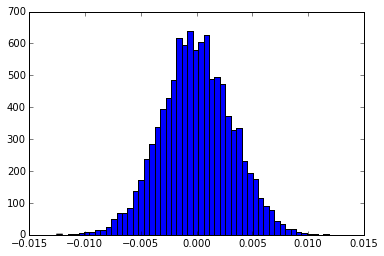

In [7]:
N_pos = 50000
N_neg = 50000
N = N_pos + N_neg
dot_vals = random_hypvec_distribution(N_pos, N_neg)
hist(dot_vals/N, 50);

print len(np.nonzero(np.abs(dot_vals/N) > 0.1)[0])